In [22]:
# https://scikit-learn.org/0.16/auto_examples/model_selection/plot_roc_crossval.html#example-model-selection-plot-roc-crossval-py
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [23]:
dataset=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_AGTTC.csv')
dataset

,indx,kmer,mean_1,mean_2,mean_3,mean_4,mean_5,std_1,std_2,std_3,...,mdintense_2,mdintense_3,mdintense_4,mdintense_5,L-1,L-2,L-3,L-4,L-5,label
0,260,AGTTC,0.513199,0.397293,-0.850444,-0.837177,-0.786233,0.047088,0.272815,0.031234,...,0.471305,-0.846254,-0.839970,-0.768751,6,81,6,15,104,1
1,259,AGTTC,0.589209,0.568374,-0.717482,-0.762448,-0.789418,0.062266,0.080098,0.038712,...,0.579342,-0.727349,-0.763294,-0.799239,6,32,6,15,90,1
2,243,AGTTC,0.458838,0.109656,-0.797939,-0.820008,-0.756034,0.149853,0.419986,0.034345,...,0.190347,-0.796560,-0.817250,-0.755180,13,6,6,33,63,1
3,260,AGTTC,0.457595,0.472804,-0.688376,-0.681815,-0.679743,0.060894,0.174125,0.025067,...,0.513802,-0.686393,-0.686393,-0.696311,6,78,6,13,108,1
4,260,AGTTC,0.528384,0.423719,-0.713185,-0.825872,-0.800544,0.029393,0.277885,0.162593,...,0.522379,-0.768558,-0.826600,-0.792575,6,51,6,11,108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,260,AGTTC,0.787659,0.405793,-0.611869,-0.739305,-0.605124,0.169036,0.279195,0.138040,...,0.463995,-0.667700,-0.744655,-0.604325,32,14,6,11,17,0
2629,161,AGTTC,0.396310,0.499622,-0.619268,-0.546544,-0.762006,0.090910,0.031997,0.130815,...,0.500937,-0.642935,-0.607435,-0.786905,39,6,6,16,16,0
2630,240,AGTTC,0.589990,0.614284,-0.632994,-0.789089,-0.753708,0.172348,0.280588,0.188418,...,0.688070,-0.685807,-0.796713,-0.751445,6,40,6,19,6,0
2631,260,AGTTC,0.661435,0.551367,-0.694797,-0.734620,-0.571503,0.110638,0.231089,0.049018,...,0.548295,-0.676666,-0.739763,-0.576580,33,34,6,11,6,0


In [21]:
X = dataset.iloc[:, 2:-1].values
y = dataset. iloc [:, -1].values
n_samples, n_features = X.shape

NameError: name 'target_names' is not defined

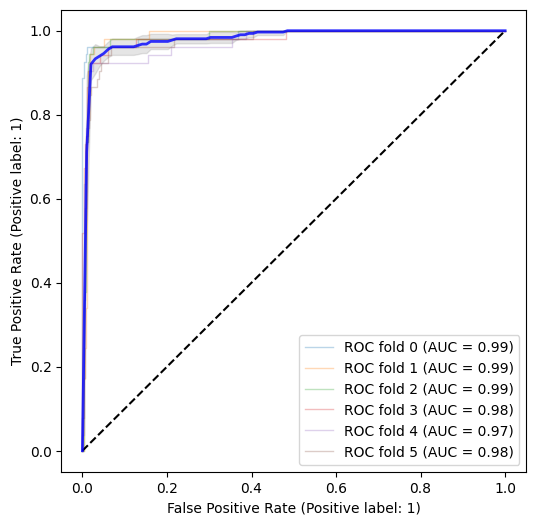

In [24]:
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

In [30]:
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1','roc_auc']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
        
        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean(),
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean(),
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              "Mean Validation AUROC score": results['test_roc_auc'].mean()
             
              
              }
    
    
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()    

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import joblib
import os
import csv
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [33]:
SVM_model =  svm.SVC(probability=True)

SVM_result = cross_validation(SVM_model, X, y, 5)
print(SVM_result)

{'Training Accuracy scores': array([0.96961064, 0.9705603 , 0.97103514, 0.97247271, 0.97342193]), 'Mean Training Accuracy': 0.9714201429594563, 'Training Precision scores': array([0.93925234, 0.94811321, 0.94418605, 0.94495413, 0.94144144]), 'Mean Training Precision': 0.943589432077841, 'Training Recall scores': array([0.79761905, 0.79761905, 0.80555556, 0.81746032, 0.82936508]), 'Mean Training Recall': 0.8095238095238095, 'Training F1 scores': array([0.86266094, 0.86637931, 0.86937901, 0.87659574, 0.88185654]), 'Mean Training F1 Score': 0.8713743108610739, 'Validation Accuracy scores': array([0.97912713, 0.971537  , 0.97343454, 0.96007605, 0.96387833]), 'Mean Validation Accuracy': 0.9696106088700658, 'Validation Precision scores': array([0.96428571, 0.875     , 0.94545455, 0.92      , 0.95833333]), 'Mean Validation Precision': 0.9326147186147186, 'Validation Recall scores': array([0.85714286, 0.88888889, 0.82539683, 0.73015873, 0.73015873]), 'Mean Validation Recall': 0.806349206349206